In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%ls

corporacion/  D11-02/  demo.ipynb  mercari.tsv  retail.dat*  train.tsv.7z*


In [3]:
%cd D11-02

/home/sgu/PRD_grocery/D11-02


In [5]:
df = pd.read_csv("D11",sep=";")

In [7]:
df.columns=['trac_dt','customer_id','age','residence_area','product_subclass','product_id','amount','asset','sale_price']

In [29]:
df.trac_dt=pd.to_datetime(df.trac_dt)

In [30]:
df.head()

,trac_dt,customer_id,age,residence_area,product_subclass,product_id,amount,asset,sale_price
0,2000-11-01,46855,D,E,110411,4710085120468,3,51,57
1,2000-11-01,539166,E,E,130315,4714981010038,2,56,48
2,2000-11-01,663373,F,E,110217,4710265847666,1,180,135
3,2000-11-01,340625,A,E,110411,4710085120697,1,17,24
4,2000-11-01,236645,D,H,712901,8999002568972,2,128,170


30

In [17]:
gb=df.groupby('product_subclass').product_id.nunique()

In [21]:
gb.sort_values(ascending=False).head()

product_subclass
100205    253
530110    121
530104    113
530114    112
320501    110
Name: product_id, dtype: int64

In [38]:
sel = df.product_subclass==100205
df1=df[sel].groupby('product_id').amount.sum()
df2=df1.sort_values(ascending=False).head()
df2

product_id
37000337270      317
4710035369510    269
4710247005206    247
4710022201496    199
37000304593      198
Name: amount, dtype: int64

In [46]:
sel = (df.product_id==37000337270)
df2 = df[sel].groupby('trac_dt').agg({'amount':np.sum,'sale_price':np.mean})
df2.head()

,sale_price,amount
trac_dt,,
2000-11-02,47.000000,2
2000-11-03,47.000000,2
2000-11-04,43.105263,42
2000-11-05,43.963636,62
2000-11-06,48.486486,46


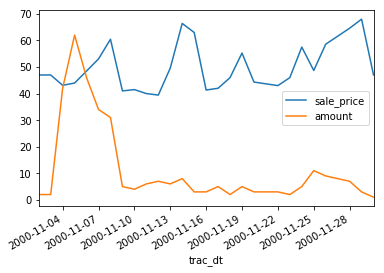

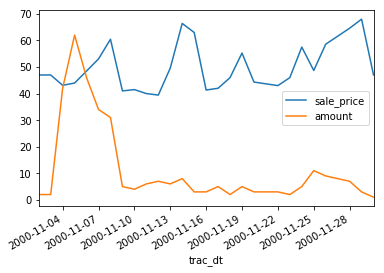

In [49]:
df2.plot(); plt.show()